### Exploring Our Data

In [ ]:
import pandas as pd

In [ ]:
def get_lines():
    with open('kickstarter-projects/ks-projects-201612.csv', 'rb') as f:
        for line in f: 
            yield line

In [ ]:
def get_weird_lines():
    for i, line in enumerate(get_lines()):
        for char in line: 
            if char > 127:
                yield line

In [ ]:
weird_lines = get_weird_lines()

In [ ]:
next(weird_lines)

In [ ]:
line = next(weird_lines)[1]


In [ ]:
df_2016 = pd.read_csv('kickstarter-projects/ks-projects-201612.csv', encoding ='iso-8859-1')

In [ ]:
df_2016.columns

In [ ]:
df_2016 = df_2016.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'], axis=1)

In [ ]:
df_2016 = df_2016.rename(columns={'ID ': 'ID', 'name ': 'name', 'category ': 'category', 
                        'main_category ': 'main_category', 'currency ': 'currency',
                        'deadline ': 'deadline', 'goal ': 'goal', 'launched ': 'launched',
                        'pledged ': 'pledged', 'state ': 'state', 'backers ': 'backers',
                        'country ': 'country', 'usd pledged ':'usd_pledged'})

In [ ]:
df_2016_all = df_2016.loc[(df_2016['state'] == 'failed') | 
                      (df_2016['state'] == 'canceled') | 
                      (df_2016['state'] == 'successful') | 
                      (df_2016['state'] == 'live') | 
                      (df_2016['state'] == 'suspended') | 
                      (df_2016['state'] == 'undefined')]

#The 2016 data set is very unreliable across the dataframe

### We are going to use our 2018 data set instead 

In [1]:
import collections
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn import tree
import pydotplus
import pandas as pd
import numpy as np

In [2]:
df_2018 = pd.read_csv('kickstarter-projects/ks-projects-201801.csv', encoding ='iso-8859-1')

In [3]:
df_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
#Detects the live in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='live']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='undefined']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='canceled']

#Detects the undefined in state and drops them 
df_2018 = df_2018.loc[df_2018['state']!='suspended']

#Detects the undefined in usd pledged and drops them 
df_2018 = df_2018.loc[~df_2018['usd pledged'].isna(), :]

#Detects the undefined in usd pledged and drops them 
df_2018 = df_2018.loc[~df_2018['name'].isna(), :]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_2018.drop("state", axis=1),
                                                    df_2018["state"],
                                                    test_size=0.25,
                                                    random_state=2019)


In [38]:
y_train.value_counts(), y_test.value_counts()


(failed        148193
 successful    100403
 Name: state, dtype: int64, failed        49418
 successful    33448
 Name: state, dtype: int64)

## One Hot Encoding

In [39]:



encoder = OneHotEncoder(drop='first', categories="auto")
encoder.fit(X_train[["category", "main_category", "country"]])



OneHotEncoder(categorical_features=None, categories='auto', drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [40]:
encoder.categories_

[array(['3D Printing', 'Academic', 'Accessories', 'Action', 'Animals',
        'Animation', 'Anthologies', 'Apparel', 'Apps', 'Architecture',
        'Art', 'Art Books', 'Audio', 'Bacon', 'Blues', 'Calendars',
        'Camera Equipment', 'Candles', 'Ceramics', "Children's Books",
        'Childrenswear', 'Chiptune', 'Civic Design', 'Classical Music',
        'Comedy', 'Comic Books', 'Comics', 'Community Gardens',
        'Conceptual Art', 'Cookbooks', 'Country & Folk', 'Couture',
        'Crafts', 'Crochet', 'DIY', 'DIY Electronics', 'Dance', 'Design',
        'Digital Art', 'Documentary', 'Drama', 'Drinks',
        'Electronic Music', 'Embroidery', 'Events', 'Experimental',
        'Fabrication Tools', 'Faith', 'Family', 'Fantasy',
        "Farmer's Markets", 'Farms', 'Fashion', 'Festivals', 'Fiction',
        'Film & Video', 'Fine Art', 'Flight', 'Food', 'Food Trucks',
        'Footwear', 'Gadgets', 'Games', 'Gaming Hardware', 'Glass',
        'Graphic Design', 'Graphic Novels', 'Har

In [41]:
ohe = pd.DataFrame(encoder.transform(X_train[["category", "main_category", "country"]]).toarray(),
                   columns=encoder.get_feature_names(["category", "main_category", "country"]))
ohe.head()

,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
X_train = X_train.reset_index(drop=True)

In [59]:
X_train.head()

,ID,goal,usd_goal_real,project_length
0,1426698687,100000.0,100000.00,30
1,1633937505,2500.0,3921.45,26
2,815178419,12000.0,12000.00,59
3,344407855,500.0,582.70,30
4,2037941839,199000.0,199000.00,29


In [44]:
X_train.shape


(248596, 14)

In [45]:
ohe.shape


(248596, 193)

In [46]:
y_train.shape

(248596,)

In [47]:
X_train['launched_datetime'] = pd.to_datetime(X_train['launched'])
X_train['deadline_datetime'] = pd.to_datetime(X_train['deadline'])
X_train['project_times'] = pd.to_datetime(X_train['deadline']) - pd.to_datetime(X_train['launched'])
'''This extracts the project days from the total project time'''
X_train['project_length'] = X_train.project_times.dt.days



In [50]:
X_train = X_train.drop(["category", "launched_datetime",'deadline_datetime',"main_category", "country", "name",
                       "currency", "launched", 'project_times',"backers", "pledged", "usd_pledged_real",
                       "usd pledged", "deadline"], axis=1)


In [51]:
X_train2 = pd.concat(objs=[X_train, ohe], axis=1)

In [52]:
X_train.shape, X_train2.shape, ohe.shape

((248596, 4), (248596, 197), (248596, 193))

#### Now make a Decision Tree Classifier

In [53]:
X_train.head()

,ID,goal,usd_goal_real,project_length
0,1426698687,100000.0,100000.00,30
1,1633937505,2500.0,3921.45,26
2,815178419,12000.0,12000.00,59
3,344407855,500.0,582.70,30
4,2037941839,199000.0,199000.00,29


In [54]:
X_train.shape

(248596, 4)

In [55]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.122576 to fit



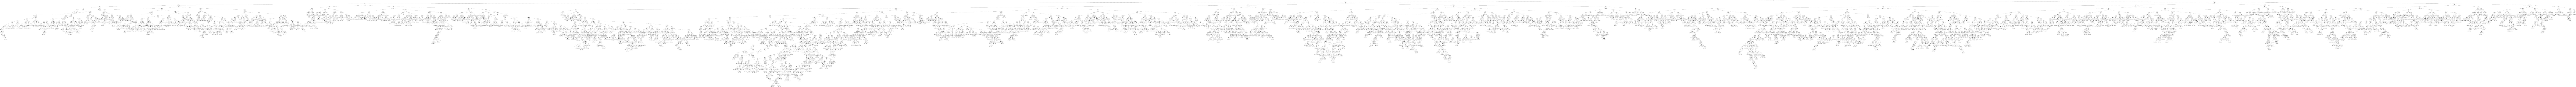

In [57]:
# Create DOT data
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=["failed", "successful"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## How well did our model do? 

In [60]:
encoder = OneHotEncoder(drop='first', categories="auto")
encoder.fit(X_test[["category", "main_category", "country"]])

OneHotEncoder(categorical_features=None, categories='auto', drop='first',
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [61]:
ohe = pd.DataFrame(encoder.transform(X_test[["category", "main_category", "country"]]).toarray(),
                   columns=encoder.get_feature_names(["category", "main_category", "country"]))
ohe.head()

,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,category_Anthologies,category_Apparel,category_Apps,category_Architecture,category_Art,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
X_test = X_test.reset_index(drop=True)

In [64]:
X_test['launched_datetime'] = pd.to_datetime(X_test['launched'])
X_test['deadline_datetime'] = pd.to_datetime(X_test['deadline'])
X_test['project_times'] = pd.to_datetime(X_test['deadline']) - pd.to_datetime(X_test['launched'])
'''This extracts the project days from the total project time'''
X_test['project_length'] = X_test.project_times.dt.days

In [65]:
X_test = X_test.drop(["category", "launched_datetime",'deadline_datetime',"main_category", "country", "name",
                       "currency", "launched", 'project_times',"backers", "pledged", "usd_pledged_real",
                       "usd pledged", "deadline"], axis=1)

In [66]:
X_test2 = pd.concat(objs=[X_test, ohe], axis=1)

In [67]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=["failed", "successful"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [68]:
y_pred = clf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Calculate Accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :68.36458861294138

Confusion Matrix
----------------


Predicted,failed,successful,All
True,,,
failed,39927,9491,49418
successful,16724,16724,33448
All,56651,26215,82866


## Model 2

Now we will prune our decision tree